In [42]:
import openmc
import numpy as np

from matplotlib import rc
import matplotlib.pyplot as plt
rc('font', **{'family': 'serif', 'serif': ['Computer Modern'], 'size': 18})
rc('text', usetex=True)

In [43]:
# define materials
dt_plasma = openmc.Material(name='dt_plasma')
dt_plasma.add_nuclide('H2', 1.0)
dt_plasma.add_nuclide('H3', 1.0)
dt_plasma.set_density('g/cm3', 1e-5)

flibe = openmc.Material(name="flibe")
flibe.add_element("Li", 2.0, "ao")
flibe.add_element("Be", 1.0, "ao")
flibe.add_element("F", 4.0, "ao")
flibe.set_density("g/cm3", 1.94)

# Inconel 718 -
inconel718 = openmc.Material(name='inconel718')
inconel718.add_element('Ni', 53.0, 'wo')
inconel718.add_element('Cr', 19.06, 'wo')
inconel718.add_element('Nb', 5.08, 'wo')
inconel718.add_element('Mo', 3.04, 'wo')
inconel718.add_element('Ti', 0.93, 'wo')
inconel718.add_element('Al', 0.52, 'wo')
inconel718.add_element('Co', 0.11, 'wo')
inconel718.add_element('Cu', 0.02, 'wo')
inconel718.add_element('C', 0.021, 'wo')
inconel718.add_element('Fe', 18.15, 'wo')
inconel718.set_density('g/cm3', 8.19)

eurofer = openmc.Material(name='eurofer')
eurofer.add_element('Cr', 8.99866, 'wo')
eurofer.add_element('C', 0.109997, 'wo')
eurofer.add_element('W', 1.5, 'wo')
eurofer.add_element('V', 0.2, 'wo')
eurofer.add_element('Ta', 0.07, 'wo')
eurofer.add_element('B', 0.001, 'wo')
eurofer.add_element('N', 0.03, 'wo')
eurofer.add_element('O', 0.01, 'wo')
eurofer.add_element('S', 0.001, 'wo')
eurofer.add_element('Fe', 88.661, 'wo')
eurofer.add_element('Mn', 0.4, 'wo')
eurofer.add_element('P', 0.005, 'wo')
eurofer.add_element('Ti', 0.01, 'wo')
eurofer.set_density('g/cm3', 7.798)

# V-4Cr-4Ti - pure -(from Segantin TRE https://github.com/SteSeg/tokamak_radiation_environment)
v4cr4ti = openmc.Material(name='v4cr4ti')
v4cr4ti.add_element('V', 0.92, 'wo')
v4cr4ti.add_element('Cr', 0.04, 'wo')
v4cr4ti.add_element('Ti', 0.04, 'wo')
v4cr4ti.set_density('g/cm3', 6.06)


In [44]:
# Define basic toroidal geometry
bigsphere = openmc.Sphere(r=1000, boundary_type="vacuum")
plasma = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=120,c=120)
vv = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=125,c=125)
blanket_tank = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=127,c=127)
tank_divider_in = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=150,c=150)
tank_divider_out = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=154,c=152)
burner_tank = openmc.ZTorus(x0=0,y0=0,z0=0,a=680,b=250,c=250)
burner_tank_volume = (2*np.pi**2*250**2 * 680) - (2*np.pi**2*152**2 * 680)
print(burner_tank_volume)

528799191.58003014


In [45]:
plasma_cell = openmc.Cell()
plasma_cell.region = -plasma
plasma_cell.fill = dt_plasma

sol_cell = openmc.Cell()
sol_cell.region = +plasma & -vv

vv_cell = openmc.Cell()
vv_cell.region = +vv & -blanket_tank
vv_cell.fill = inconel718

blanket1_cell = openmc.Cell()
blanket1_cell.region = +blanket_tank & -tank_divider_in
blanket1_cell.fill = flibe

tank_divider_cell = openmc.Cell()
tank_divider_cell.region = +tank_divider_in & -tank_divider_out
tank_divider_cell.fill = inconel718

blanket2_cell = openmc.Cell()
blanket2_cell.region = +tank_divider_out & -burner_tank
blanket2_cell.fill = flibe

container_cell = openmc.Cell()
container_cell.region = +burner_tank & -bigsphere

universe = openmc.Universe()
universe.add_cell(plasma_cell)
universe.add_cell(sol_cell)
universe.add_cell(vv_cell)
universe.add_cell(blanket1_cell)
universe.add_cell(tank_divider_cell)
universe.add_cell(blanket2_cell)
universe.add_cell(container_cell)


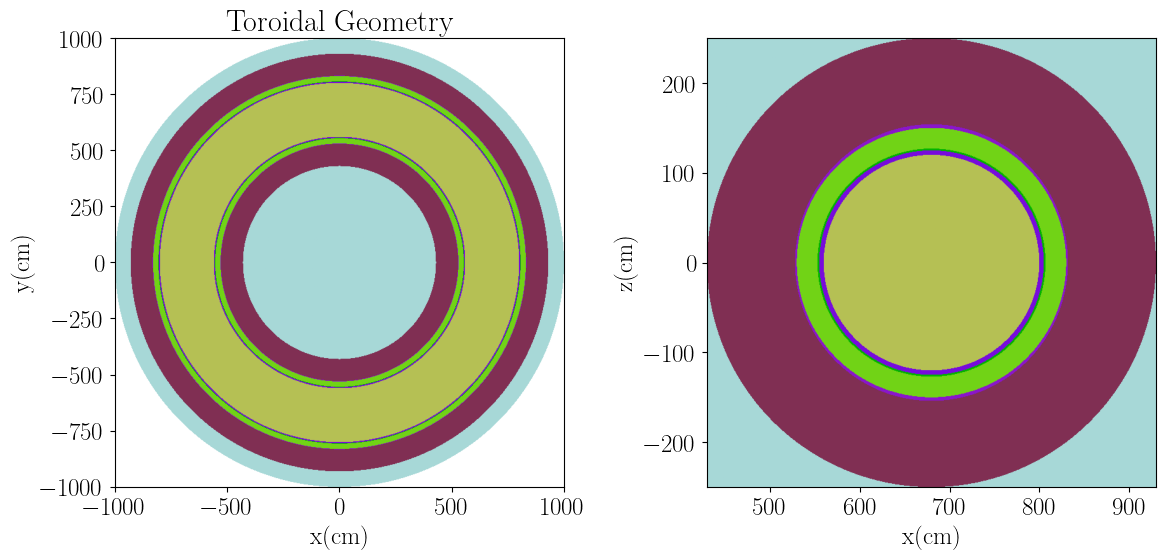

In [60]:

fig, ax = plt.subplots(1,2, figsize=[12,6])

universe.plot(width=(2000.0, 2000.0),
               origin=(0.0, 0.0, 0.1),
               pixels=500000,
               color_by='cell',
               axes=ax[0]
               )

universe.plot(width=(500.0, 500.0), 
              origin=(680.0, 0.0, 0.1), 
              basis='xz',
              pixels=500000,
              color_by='cell',
              axes=ax[1]
               )

ax[0].set_title('Toroidal Geometry')
ax[0].set_xlabel('x(cm)')
ax[0].set_ylabel('y(cm)')
ax[1].set_xlabel('x(cm)')
ax[1].set_ylabel('z(cm)')
fig.tight_layout()
plt.savefig('geometry.png')
